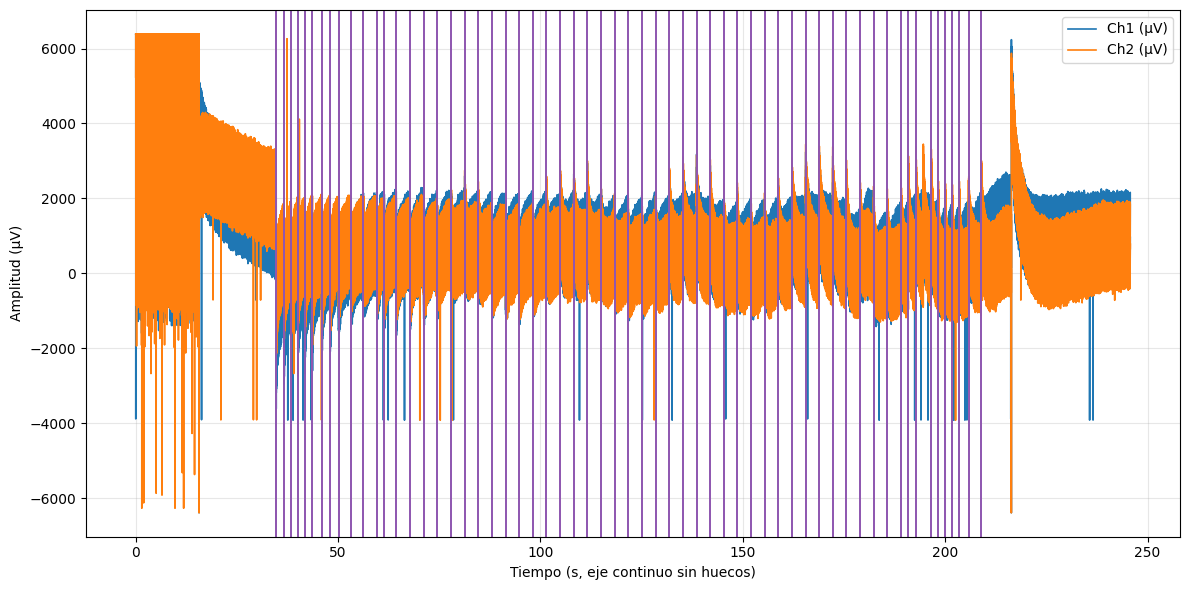

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Archivos
# -----------------------------
ecg_csv_path = "P4_R001_ECG_timeline_20260121_120405.csv"
events_csv_path = "P4_R001_STIM_EVENTS_20260121_120405.csv"

fs = 2877  # Hz

# -----------------------------
# Cargar ECG
# -----------------------------
ecg = pd.read_csv(
    ecg_csv_path,
    sep=";",
    decimal=",",
    dtype={"Index": "Int64"}
)

ch1_val = ecg["Ch1_val_uV"].to_numpy()
ch2_val = ecg["Ch2_val_uV"].to_numpy()

# tiempos reales de cada muestra (us)
ts_samples = ecg["Ch1_ts_us"].to_numpy()

# eje temporal CONTINUO (sin huecos)
t_comp = np.arange(len(ts_samples)) / fs

# -----------------------------
# Cargar eventos de estimulación
# -----------------------------
events = pd.read_csv(events_csv_path, sep=";")

ts_events = events["ts_us"].to_numpy()

# Mapear ts_us -> índice de muestra más cercana
idx_events = np.searchsorted(ts_samples, ts_events, side="left")
idx_events[idx_events >= len(t_comp)] = len(t_comp) - 1

# Tiempo comprimido equivalente
t_events_comp = t_comp[idx_events]

# -----------------------------
# Gráfico
# -----------------------------
ch1_color = "#1f77b4"
ch2_color = "#ff7f0e"
stim_color = "#8f57b0"

plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.plot(t_comp, ch1_val, color=ch1_color, lw=1.2, label="Ch1 (µV)")
ax.plot(t_comp, ch2_val, color=ch2_color, lw=1.2, label="Ch2 (µV)")

for t in t_events_comp:
    ax.axvline(t, color=stim_color, lw=1.4, alpha=0.9)

ax.set_xlabel("Tiempo (s, eje continuo sin huecos)")
ax.set_ylabel("Amplitud (µV)")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [6]:

import pandas as pd
import numpy as np
import plotly.graph_objects as go

import plotly.graph_objects as go
import plotly.io as pio


# Rutas de los archivos


# Crear figura interactiva
fig = go.Figure()

# Canal 1
fig.add_trace(go.Scatter(x=t_comp, y=ch1_val, mode='lines', name='Ch1 (µV)', line=dict(color=ch1_color)))

# Canal 2 (opcional)
fig.add_trace(go.Scatter(x=t_comp, y=ch2_val, mode='lines', name='Ch2 (µV)', line=dict(color=ch2_color)))

# Líneas de estímulos
for t in t_events_comp[1:]:
    fig.add_vline(x=t, line=dict(color=stim_color, width=1.4), opacity=0.9)

# Ajustar rango inicial
# fig.update_xaxes(range=[0.5, 0.6])

# Título y diseño
fig.update_layout(title="Received values", xaxis_title="Time (s)", yaxis_title="Voltage (µV)", template="plotly_white")


pio.renderers.default = "browser"

# ... tu código para construir 'fig' ...

# (añade tus traces y vlines aquí)

fig.show()  # Esto abrirá una pestaña del navegador con el

